In [1]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Circular Task analysis Assignment"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Antoine Lescarboura & Alexis Lagarde"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Circular Task analysis Assignment

28 November 2025, 18:39:10

by Antoine Lescarboura & Alexis Lagarde

In [2]:
# imports (this is all you need for this assignment - please, do not import anything else)
import numpy as np
import matplotlib.pyplot as plt
import os

# very useful for zoomable plots in Jupyter notebooks
%matplotlib widget

# import pandas as pd # we do not use pandas here

In [3]:
file = './data/001MoDe_R1.csv'
file2 = './data/001MoDe_R1.marker.csv'

with open(file, 'r', encoding='utf-8') as f:
    firstLine = f.readline().strip()


if firstLine:
    data = firstLine.split(';')
    print("Header line information in 'data/001MoDe_R1.csv':")
    for d in data:
        print("  " + d.strip())


Header line information in 'data/001MoDe_R1.csv':
  screenWidth 1104
  screenHeight 661
  cornerX 302
  cornerY 80
  centerX 552
  centerY 330
  externalRadius 250
  internalRadius 170
  borderRadius 1
  cursorRadius 16
  indexOfDifficulty 28.00696429476858
  taskRadius 209.5
  taskTolerance 47
  borderColor java.awt.Color[r=255,g=255,b=255]
  backgroundColor java.awt.Color[r=0,g=0,b=0]
  cursorColorRecord java.awt.Color[r=255,g=0,b=0]
  cursorColorWait java.awt.Color[r=255,g=255,b=0]
  autoStart 3600
  cycleMaxNumber 6
  cycleDuration 20
  software LSL-mouse
  version 1.2.0rc5
  task CircularTarget
  isWithLSL false


In [4]:
SEPARATOR = ',' 

print("Markers in 'data/001MoDe_R1.marker.csv':")

lines_after_date = []
processing_block = False
def check_date_format_manual(s):

    if len(s) < 10:
        return False
    
    if s[4] != '-' or s[7] != '-':
        return False
    
    try:
        if not s[0:4].isdigit(): return False
        if not s[5:7].isdigit(): return False
        if not s[8:10].isdigit(): return False
        return True
    except IndexError:
        return False


def print_aligned_block(lines):
    if not lines:
        return

    split_lines = [line.split(SEPARATOR) for line in lines]

    max_widths = []
    num_cols = max(len(cols) for cols in split_lines) if split_lines else 0

    for col in range(num_cols):
        max_width = 0
        for cols in split_lines:
            if col < len(cols):
                max_width = max(max_width, len(cols[col].strip()))
        max_widths.append(max_width)

    for cols in split_lines:
        padded = []
        for i, col in enumerate(cols):
            content = col.strip()
            padded.append(content.ljust(max_widths[i]))
                 
        print("    " + " , ".join(padded))



try:
    with open(file2, 'r', encoding='utf-8') as f:
        for i in range(3):
            next(f) 
        
        for line in f:
            stripped = line.strip()

            if check_date_format_manual(stripped):
                
                print_aligned_block(lines_after_date)
                lines_after_date = []
                processing_block = True


                parts = stripped.split(SEPARATOR, 1)
                stripped_content = parts[1].strip() if len(parts) > 1 else stripped

                subparts = stripped_content.split(SEPARATOR, 1)
                if len(subparts) == 2:
                    stripped_output = f"{subparts[0].strip()}: {subparts[1].strip()}"
                else:
                    stripped_output = stripped_content

                print(stripped_output)

            elif processing_block:
                lines_after_date.append(stripped)
            
            else:
                print(" " + stripped)

except FileNotFoundError:
    print(f"Erreur: Le fichier '{file2}' est introuvable. Veuillez vérifier le chemin.")
except Exception as e:
    print(f"Une erreur est survenue lors du traitement du fichier: {e}")

print_aligned_block(lines_after_date)



Markers in 'data/001MoDe_R1.marker.csv':
1616776712325: KeyTyped=32 DoCycleChange
1616776712331: DoCycleChange:DoStartCycleTimedSequence
1616776712333: DoCycleChange:DoRecord RecordDone=0 PauseDone=0 ToDo=6
1616776732336: DoCycleChange:DoPause RecordDone=1 PauseDone=0 ToDo=6
1616776752340: DoCycleChange:DoRecord RecordDone=1 PauseDone=1 ToDo=6
1616776772351: DoCycleChange:DoPause RecordDone=2 PauseDone=1 ToDo=6
1616776792372: DoCycleChange:DoRecord RecordDone=2 PauseDone=2 ToDo=6
1616776812386: DoCycleChange:DoPause RecordDone=3 PauseDone=2 ToDo=6
1616776832390: DoCycleChange:DoRecord RecordDone=3 PauseDone=3 ToDo=6
1616776852404: DoCycleChange:DoPause RecordDone=4 PauseDone=3 ToDo=6
1616776872419: DoCycleChange:DoRecord RecordDone=4 PauseDone=4 ToDo=6
1616776892433: DoCycleChange:DoPause RecordDone=5 PauseDone=4 ToDo=6
1616776898364: KeyTyped=113 WINDOW_CLOSING
1616776898367: 
    Var    , nLaps  , Re     , Te    , error , MT/lap , IDe/lap , Be     , IPe   , 
    unit   , lap    , pix

In [5]:
def get_column(file, col="A", sep=","):
    col_index = 0
    for char in col.upper():
        col_index = col_index * 26 + (ord(char) - ord("A") + 1)
    col_index -= 1

    values = []
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    for line in lines:
        cols = line.strip().split(sep)
        if col_index < len(cols):
            values.append(cols[col_index])
        else:
            values.append("")
    return values


def find_segments_from_column(col):
    segments = []
    start = None

    if col[0] != "0":
        start = 0

    for i in range(1, len(col)):
        curr = col[i]
        prev = col[i-1]

        if prev == "0" and curr != "0" and start is None:
            start = i

        if curr == "0" and start is not None:
            segments.append((start, i - 1))
            start = None

    if start is not None:
        segments.append((start, len(col) - 1))

    return segments



def compute_segment_times(col, segments):
    times = []
    for start, end in segments:
        t_start = int(col[start])
        t_end = int(col[end])
        duration = (t_end - t_start) / 1000.0
        times.append((start, end, t_start, t_end, duration))
    return times

def sanitize_column(col):
    clean = []
    for val in col:
        try:
            int(val)      
            clean.append(val)
        except:
            clean.append("0")   
    return clean



file = "./data/001MoDe_R1.csv"

colA_raw = get_column(file, "A")
colA = sanitize_column(colA_raw)


segments = find_segments_from_column(colA)

results = compute_segment_times(colA, segments)


print("record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):")
for i, (s, e, t1, t2, dur) in enumerate(results, 1):
    print(f" {t1} to {t2} ({dur:.3f} s)")
    
print("\n")

segments = find_segments_from_column(colA)
results = compute_segment_times(colA, segments)

if len(results) > 0:
    first_dorecord_marker = int(results[0][2])
else:
    first_dorecord_marker = 0
print("record times (seconds since the first DoRecord marker):")
for i, (s, e, t_start, t_end, dur) in enumerate(results, 1):
    t_start_sec = (int(t_start) - first_dorecord_marker) / 1000
    t_end_sec   = (int(t_end)   - first_dorecord_marker) / 1000
    print(f"{t_start_sec:.3f} to {t_end_sec:.3f}  ({dur:.3f} s)")


record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):
 1616776712329 to 1616776732333 (20.004 s)
 1616776752758 to 1616776772347 (19.589 s)
 1616776792700 to 1616776812379 (19.679 s)
 1616776832937 to 1616776852398 (19.461 s)
 1616776872475 to 1616776892427 (19.952 s)


record times (seconds since the first DoRecord marker):
0.000 to 20.004  (20.004 s)
40.429 to 60.018  (19.589 s)
80.371 to 100.050  (19.679 s)
120.608 to 140.069  (19.461 s)
160.146 to 180.098  (19.952 s)


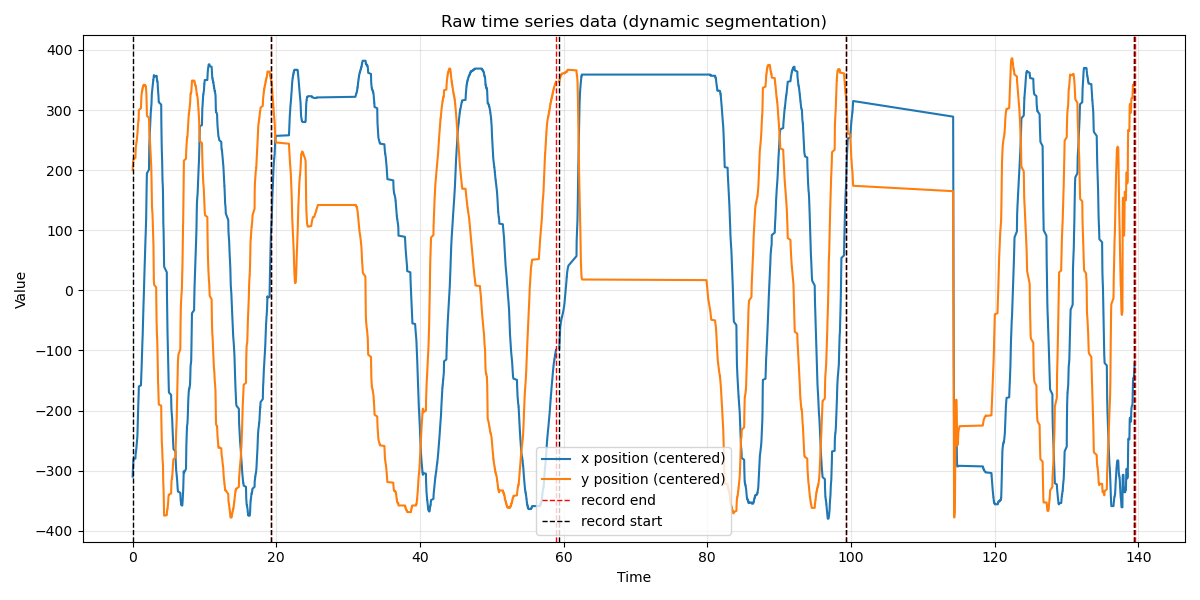

In [19]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/data.csv"

def find_value_in_csv(file, key, sep=","):
    with open(file, "r", encoding="utf-8") as f:
        for line in f:
            cells = line.strip().split(sep)
            for cell in cells:
                if key in cell:
                    return cell
    return None

def extract_numeric_value(cell, key):
    if cell is None:
        return None
    parts = cell.replace(";", " ").split()
    for i in range(len(parts) - 1):
        if parts[i] == key:
            try:
                return float(parts[i + 1])
            except:
                return None
    return None

raw_centerX = find_value_in_csv(file, "centerX")
raw_centerY = find_value_in_csv(file, "centerY")

CENTER_X = extract_numeric_value(raw_centerX, "centerX")
CENTER_Y = extract_numeric_value(raw_centerY, "centerY")

timestamps = []
mouseX_list = []
mouseY_list = []

with open(file, 'r') as f:
    lines = f.readlines()
    for i in range(1, len(lines)):
        line = lines[i].strip()
        if not line:
            continue
        parts = line.split(',')
        if len(parts) >= 3:
            try:
                ts = int(parts[0])
                mx = float(parts[1])
                my = float(parts[2])
                timestamps.append(ts)
                mouseX_list.append(mx)
                mouseY_list.append(my)
            except:
                continue

timestamp = np.array(timestamps, dtype=np.int64)
mouseX = np.array(mouseX_list)
mouseY = np.array(mouseY_list)

mouseX_centered = mouseX - CENTER_X
mouseY_centered = mouseY - CENTER_Y

def find_segments(ts):
    segments = []
    start = None
    if ts[0] > 0:
        start = 0
    for i in range(1, len(ts)):
        if ts[i-1] == 0 and ts[i] > 0:
            start = i
        if ts[i] == 0 and start is not None:
            segments.append((start, i))
            start = None
    if start is not None:
        segments.append((start, len(ts)))
    return segments

segments = find_segments(timestamp)

def extract_segment(start_idx, end_idx):
    return (
        timestamp[start_idx:end_idx],
        mouseX_centered[start_idx:end_idx],
        mouseY_centered[start_idx:end_idx]
    )

plt.figure(figsize=(12, 6))

first = True
for i, (start, end) in enumerate(segments):
    ts_seg, x_seg, y_seg = extract_segment(start, end)
    ts_seg = np.where(ts_seg == 0, np.nan, ts_seg)
    t_rel_global = (ts_seg - timestamp[0]) / 1000.0
    if first:
        plt.plot(t_rel_global, x_seg, color="tab:blue", linewidth=1.5, label="x position (centered)")
        plt.plot(t_rel_global, y_seg, color="tab:orange", linewidth=1.5, label="y position (centered)")
        first = False
    else:
        plt.plot(t_rel_global, x_seg, color="tab:blue", linewidth=1.5)
        plt.plot(t_rel_global, y_seg, color="tab:orange", linewidth=1.5)

valid_ts_indices = np.where(timestamp != 0)[0]
if len(valid_ts_indices) > 0:
    first_valid_idx = valid_ts_indices[0]
    t_first_valid = (timestamp[first_valid_idx] - timestamp[0]) / 1000.0
    plt.axvline(x=t_first_valid, color='black', linestyle='--', linewidth=1)

zero_indices = np.where(timestamp == 0)[0]

record_start_added = False
record_end_added = False

for idx in zero_indices:
    prev_idx = idx - 1
    next_idx = idx + 1
    if prev_idx >= 0:
        t_black = (timestamp[prev_idx] - timestamp[0]) / 1000.0
        if not record_end_added:
            plt.axvline(x=t_black, color='red', linestyle='--', linewidth=1, label="record end")
            record_end_added = True
        else:
            plt.axvline(x=t_black, color='red', linestyle='--', linewidth=1)
    if next_idx < len(timestamp):
        t_red = (timestamp[next_idx] - timestamp[0]) / 1000.0
        if not record_start_added:
            plt.axvline(x=t_red, color='black', linestyle='--', linewidth=1, label="record start")
            record_start_added = True
        else:
            plt.axvline(x=t_red, color='black', linestyle='--', linewidth=1)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw time series data (dynamic segmentation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


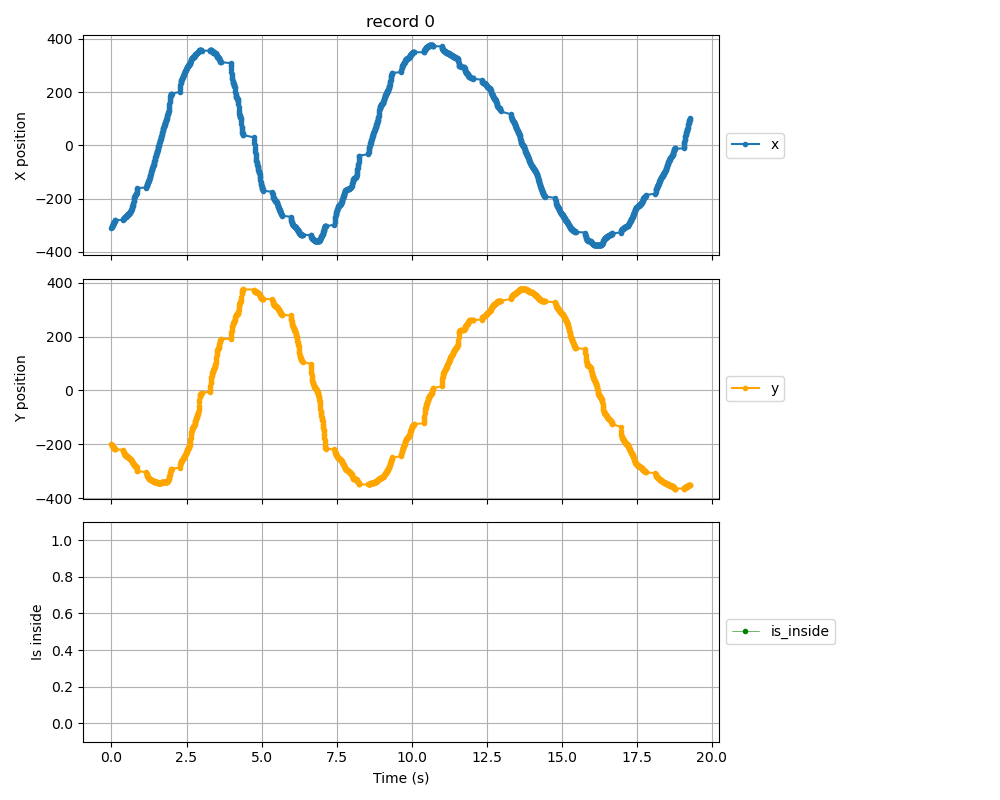

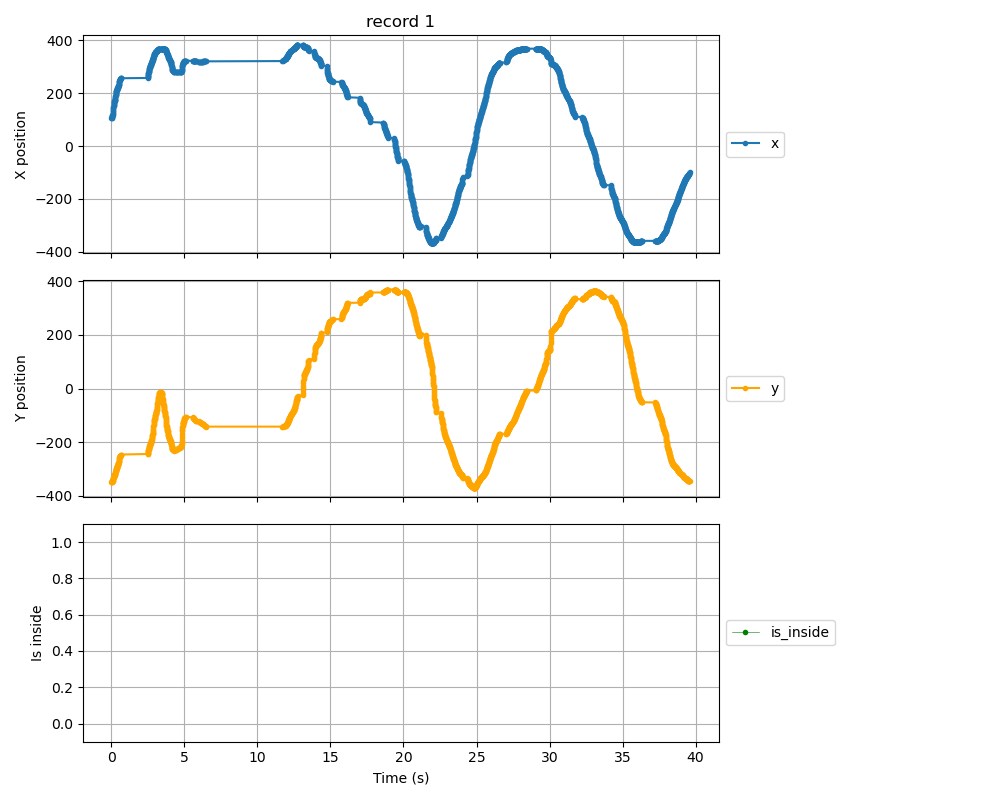

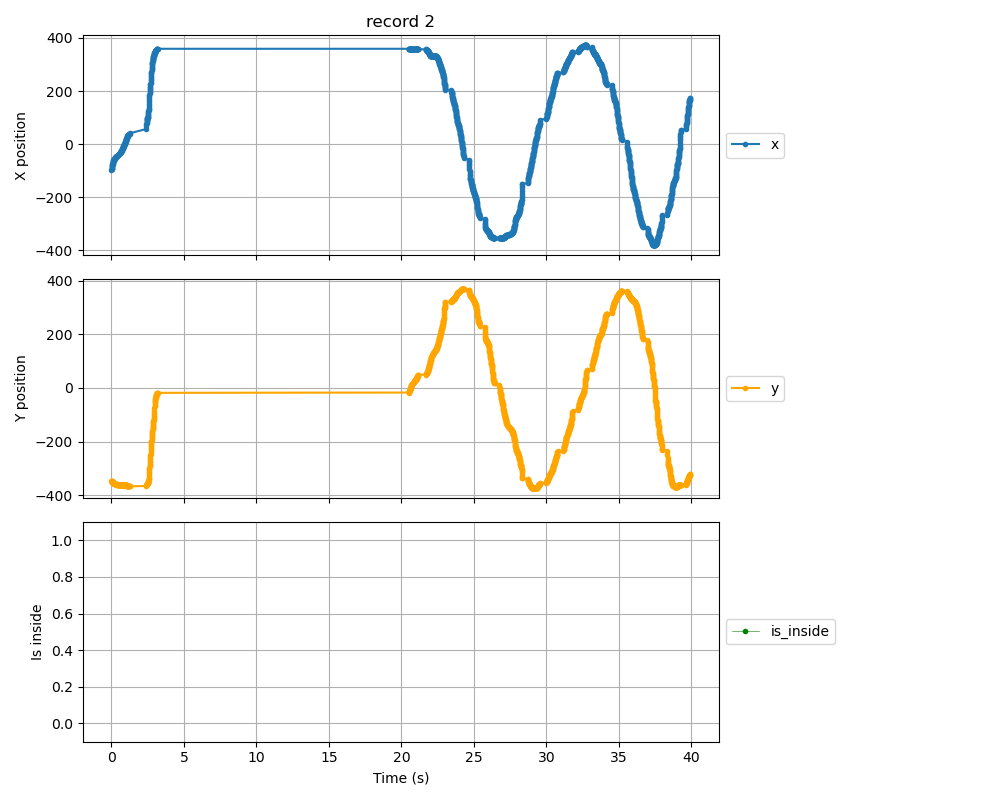

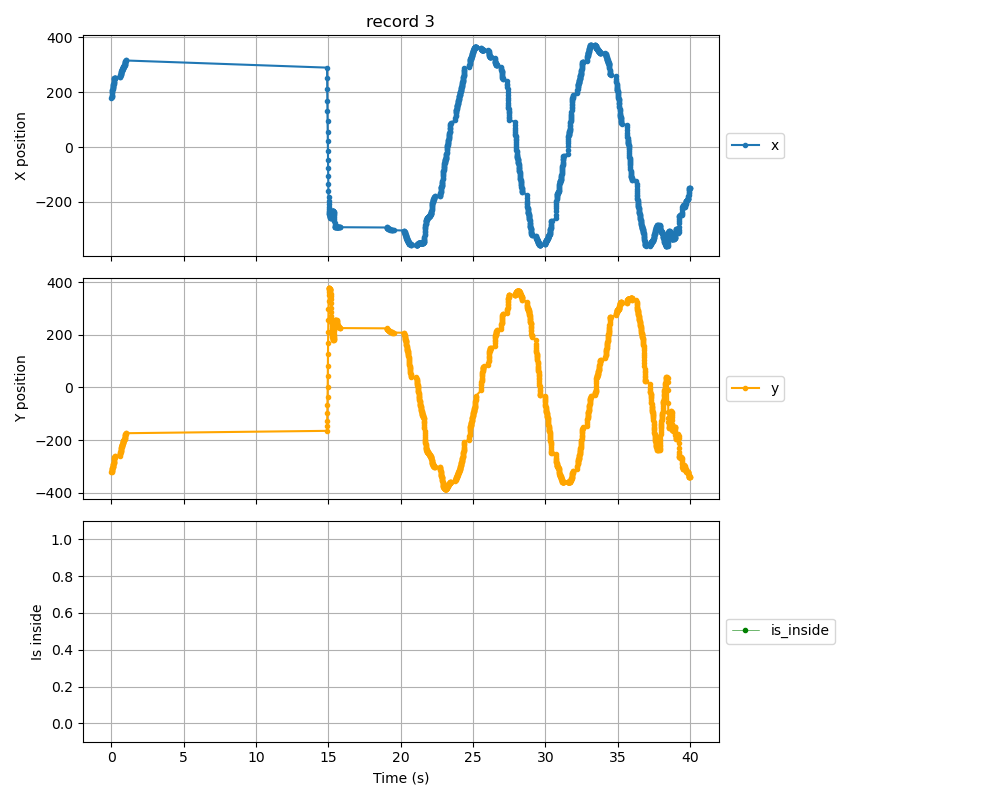

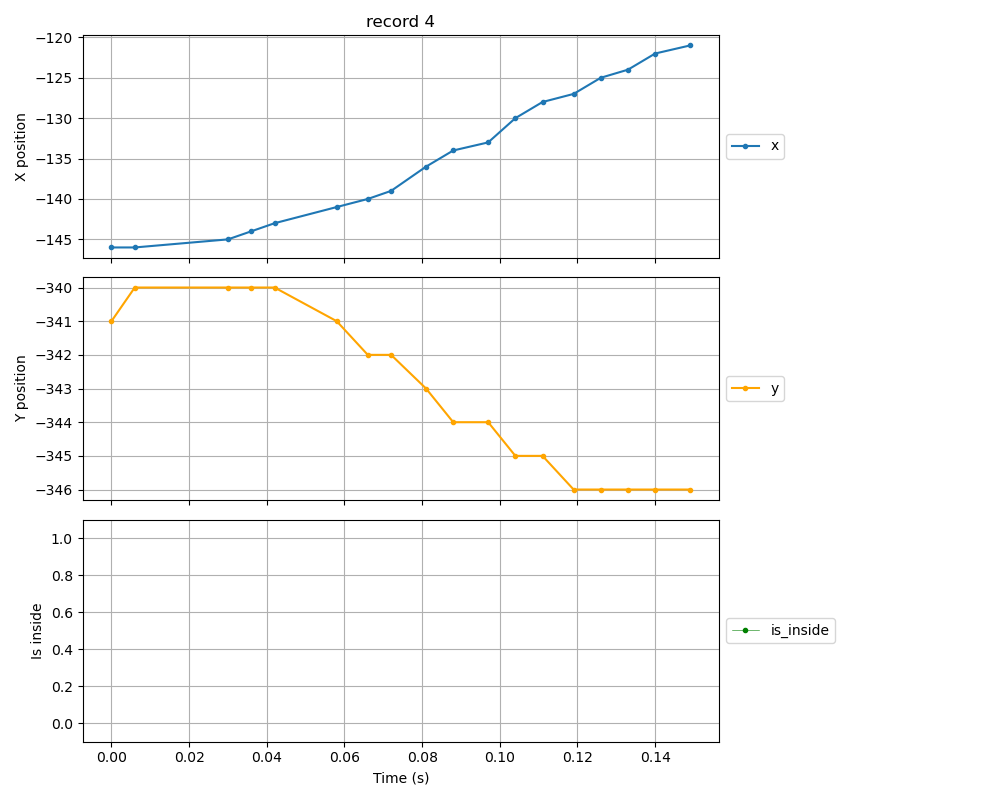

In [20]:
import numpy as np
import matplotlib.pyplot as plt

FILE = "./data/data.csv"

def find_value_in_csv(file, key, sep=","):
    with open(file, "r", encoding="utf-8") as f:
        for row_idx, line in enumerate(f):
            cols = line.strip().split(sep)
            for col_idx, cell in enumerate(cols):
                if key in cell:
                    return cell
    return None


def extract_numeric_value(cell, key):
    if cell is None:
        return None

    parts = cell.replace(";", " ").split()

    for i in range(len(parts) - 1):
        if parts[i] == key:
            try:
                return float(parts[i + 1])
            except:
                return None
    return None


raw_centerX = find_value_in_csv(FILE, "centerX")
raw_centerY = find_value_in_csv(FILE, "centerY")

CENTER_X = extract_numeric_value(raw_centerX, "centerX")
CENTER_Y = extract_numeric_value(raw_centerY, "centerY")

full_data = np.genfromtxt(FILE, delimiter=',', skip_header=3, names=True)
data = full_data[['timestamp', 'mouseX', 'mouseY', 'mouseInTarget']]

def find_segments(data):
    ts = data["timestamp"]
    segments = []
    start = None

    if ts[0] > 0:
        start = 0

    for i in range(1, len(ts)):
        if ts[i-1] == 0 and ts[i] > 0:
            start = i
        
        if ts[i] == 0 and start is not None:
            segments.append((start, i))
            start = None

    if start is not None:
        segments.append((start, len(ts)))

    return segments


segments_indices = find_segments(data)

def process_segments(data_slice):
    Xc = data_slice['mouseX'] - CENTER_X
    Yc = data_slice['mouseY'] - CENTER_Y

    t0 = data_slice['timestamp'][0]
    T_full = (data_slice['timestamp'] - t0) / 1000.0

    MT = data_slice['mouseInTarget']

    diff_ts = np.diff(data_slice['timestamp'])
    progress_idx = np.where(diff_ts > 0)[0]

    if len(progress_idx) > 0:
        last_valid = progress_idx[-1] + 1
    else:
        last_valid = len(data_slice)

    return (
        T_full[:last_valid],
        Xc[:last_valid],
        Yc[:last_valid],
        MT[:last_valid]
    )


segments = [process_segments(data[start:end]) for start, end in segments_indices]

def plot_segment(T, X, Y, target, segment_number):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    ax1.plot(T, X, linestyle='-', marker=".", label="x")
    ax1.set_ylabel("X position")
    ax1.set_title(f"record {segment_number - 1}")
    ax1.grid(True)
    ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    ax2.plot(T, -Y, linestyle='-', marker=".", color='orange', label="y")
    ax2.set_ylabel("Y position")
    ax2.grid(True)
    ax2.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    ax3.plot(T, target, linestyle='-', marker=".", linewidth=0.4, color='green', label="is_inside")
    ax3.set_xlabel("Time (s)")
    ax3.set_ylabel("Is inside")
    ax3.set_ylim(-0.1, 1.1)
    ax3.grid(True)
    ax3.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


for i, (T, X, Y, trg) in enumerate(segments, start=1):
    plot_segment(T, X, Y, trg, i)


In [ ]:
import numpy as np

# ---- CONSTANTS ----
K_FITTS = 4.133
TARGET_SLOPES = [1.95, 0.73, 0.90, 0.79, 0.93]

SEGMENT_WINDOWS = [
    (0.004, 20.007),
    (40.011, 60.022),
    (80.043, 100.057),
    (120.061, 140.075),
    (160.090, 180.104)
]

ABS_START_TIME = 1616776712.333
INPUT_FILE = "./data/001MoDe_R1.csv"


# ---- READ FILE ----
def load_metadata_and_samples(path):
    metadata = {}
    header_end = 0

    with open(path, "r") as f:
        lines = f.readlines()

    for idx, raw in enumerate(lines):
        line = raw.strip()

        if idx == 0:
            items = line.split(";")
            for entry in items:
                entry = entry.strip()
                if not entry:
                    continue

                if " " in entry:
                    k, v = entry.rsplit(" ", 1)
                    k = k.strip()
                    v = v.strip()

                    try:
                        if k in [
                            "screenWidth", "screenHeight",
                            "cornerX", "cornerY",
                            "centerX", "centerY",
                            "externalRadius", "internalRadius",
                            "cycleDuration",
                            "taskRadius", "taskTolerance",
                            "indexOfDifficulty"
                        ]:
                            metadata[k] = float(v)
                        else:
                            metadata[k] = v
                    except ValueError:
                        metadata[k] = v

        elif "timestamp,mouseX,mouseY,mouseInTarget" in line:
            header_end = idx + 1
            break

    arr = np.loadtxt(path, delimiter=",", skiprows=header_end)

    if arr[0, 0] > 1e12:
        arr[:, 0] /= 1000.0

    return metadata, arr


# ---- LAPS COMPUTATION ----
def compute_lap_fraction(px, py, cx, cy):
    dx = px - cx
    dy = py - cy
    ang = np.arctan2(dy, dx)

    ang_unwrapped = np.unwrap(ang)
    delta = ang_unwrapped[-1] - ang_unwrapped[0]

    return delta / (2 * np.pi)


# ---- MAIN PER-CYCLE ANALYSIS ----
def evaluate_cycle(segment, meta, slope):
    t = segment[:, 0]
    xs = segment[:, 1]
    ys = segment[:, 2]
    radius_vec = segment[:, 4]

    npts = len(xs)
    r_ext = meta["externalRadius"]
    r_int = meta["internalRadius"]

    if npts > 1:
        cycle_dur = t[-1] - t[0]
        dt = np.diff(t, prepend=t[0])
    else:
        cycle_dur = 0
        dt = np.array([0])

    avg_radius = np.mean(radius_vec)
    std_radius = np.std(radius_vec)
    T_eff = K_FITTS * std_radius

    out_mask = (radius_vec < r_int) | (radius_vec > r_ext)
    time_out = np.sum(dt[out_mask])
    pct_err = (time_out / cycle_dur) * 100 if cycle_dur > 0 else 0

    laps = compute_lap_fraction(xs, ys, meta["centerX"], meta["centerY"])

    if abs(laps) > 0 and T_eff > 0:
        MT = cycle_dur / abs(laps)
        ID_eff = np.log2((2 * np.pi * avg_radius) / T_eff)
        throughput = ID_eff / MT
    else:
        MT = np.nan
        ID_eff = np.nan
        throughput = 0

    return {
        "laps": laps,
        "Re": avg_radius,
        "Te": T_eff,
        "err": pct_err,
        "MT": MT,
        "IDe": ID_eff,
        "slope": slope,
        "TP": throughput,
    }


# ---- GLOBAL PROCESS ----
def run_full_analysis(file_path, slopes, windows):
    meta, raw = load_metadata_and_samples(file_path)

    cx, cy = meta["centerX"], meta["centerY"]
    radii = np.sqrt((raw[:, 1] - cx)**2 + (raw[:, 2] - cy)**2)
    raw_with_r = np.hstack((raw, radii[:, None]))

    results = []

    for idx, (w_start, w_end) in enumerate(windows):
        abs_start = ABS_START_TIME + w_start
        abs_end = ABS_START_TIME + w_end

        subset = raw_with_r[(raw_with_r[:, 0] >= abs_start) & (raw_with_r[:, 0] <= abs_end)]

        if len(subset) > 0:
            metrics = evaluate_cycle(subset, meta, slopes[idx])
        else:
            metrics = {k: np.nan for k in ["laps", "Re", "Te", "err", "MT", "IDe", "slope", "TP"]}

        metrics["label"] = f"Rec{idx+1:03d}"
        results.append(metrics)

    output = []
    header = "   " + "Var , nLaps ,     Re ,     Te ,   error , MT/lap , IDe/lap ,     Be ,     IPe ,"
    units =  "  ""unit ,   lap ,  pixel ,  pixel ,       % ,  s/lap , bit/lap , double ,   bit/s ,"
    output.append(header)
    output.append(units)

    th_Re = meta.get("taskRadius", np.nan)
    th_Te = meta.get("taskTolerance", np.nan)
    th_err = 3.88
    th_slope = 1.00

    theory = (
        f"Theory ,  1.00 , {th_Re:6.2f} , {th_Te:6.2f} , {th_err:7.2f} ,        ,         ,"
        f" {th_slope:6.2f} ,         ,"
    )
    output.append(theory)

    for r in results:
        nl = -r["laps"]

        line = (
            f"{r[ 'label']} , {-nl:5.2f} , {r['Re']:6.2f} , {r['Te']:6.2f} , {r['err']:7.2f} , "
            f"{r['MT']:6.2f} , {r['IDe']:7.2f} , {r['slope']:6.2f} , {r['TP']:7.2f} ,"
        )

        line = line.replace("   nan", "      -").replace("  nan", "     -")
        output.append(line)

    return "\n".join(output)


# ---- RUN SCRIPT ----
table = run_full_analysis(INPUT_FILE, TARGET_SLOPES, SEGMENT_WINDOWS)
print("recomputed statistics for all records:")
print(table)


recomputed statistics for all records:
   Var , nLaps ,     Re ,     Te ,   error , MT/lap , IDe/lap ,     Be ,     IPe ,
  unit ,   lap ,  pixel ,  pixel ,       % ,  s/lap , bit/lap , double ,   bit/s ,
Theory ,  1.00 , 209.50 ,  47.00 ,    3.88 ,        ,         ,   1.00 ,         ,
Rec001 , 10.84 , 213.86 ,  91.79 ,    3.33 ,   1.84 ,    3.87 ,   1.95 ,    2.10 ,
Rec002 , 12.09 , 212.99 ,  98.14 ,    2.49 ,   1.62 ,    3.77 ,   0.73 ,    2.33 ,
Rec003 , 13.35 , 210.66 ,  60.61 ,    2.14 ,   1.47 ,    4.45 ,   0.90 ,    3.02 ,
Rec004 , 12.91 , 210.45 ,  51.96 ,    1.33 ,   1.51 ,    4.67 ,   0.79 ,    3.10 ,
Rec005 , 14.88 , 214.14 , 104.52 ,    3.56 ,   1.34 ,    3.69 ,   0.93 ,    2.75 ,
